# Titanic: Random Forest Classifier

### 1 - Import the libraries and data files

In [29]:
import pandas as pd

# Import the class of the machine learning model
from sklearn.ensemble import RandomForestClassifier

# Import GridSearchCV for finding the optimal hyperparamters 
# (i.e, configuration of model)
from sklearn.model_selection import GridSearchCV

# Import metrics for measuring performance of the model
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [30]:
trainF = pd.read_csv('./train_features.csv')
trainL = pd.read_csv('./train_labels.csv')

valF = pd.read_csv('./val_features.csv')
valL = pd.read_csv('./val_labels.csv')

testF = pd.read_csv('./test_features.csv')
testL = pd.read_csv('./test_labels.csv')

### 2 - Find and configure the best hyperparameters

In [31]:
# ::: Definitions :::

# Parameters:
# Parameters are the weights of features. This is what the model
# has to find.

# Hyperparamters:
# Hyperparamters are the configurations for the model. This is what
# the data scientists must determine.

In [32]:
def printResults(gridSearchResults):

    print( 'Best ML Hyperparameters: {}\n'.format(gridSearchResults.best_params_) )

    means = gridSearchResults.cv_results_['mean_test_score']
    stnDvs = gridSearchResults.cv_results_['std_test_score']

    for mean, stnDvs, parameters in zip( means, stnDvs, gridSearchResults.cv_results_['params'] ):
        print(
            '{} (+/-{}) for {}'.format(
                round(mean, 3),
                round(stnDvs*2, 3),
                parameters
            ) 
        )



In [33]:
# Create instance of RandomForestClassifier model
rf_model = RandomForestClassifier()

hyperparameters_to_try = {
    'n_estimators': [5, 50, 100], # n_estimators are number of decision trees
    'max_depth': [2, 10, 20, None] # different heights of trees
}


# GridSearchCV
# Will search for models with best parameters and their
# corresonding hyperparameters
gridSearch = GridSearchCV(rf_model, hyperparameters_to_try, cv=5, verbose=0)

# .fit() will make model learn witht training features and labels 
gridSearch.fit( trainF, trainL.values.ravel() )

# Print the results with clear formatting
printResults( gridSearch )

Best ML Hyperparameters: {'max_depth': 10, 'n_estimators': 100}

0.756 (+/-0.059) for {'max_depth': 2, 'n_estimators': 5}
0.792 (+/-0.06) for {'max_depth': 2, 'n_estimators': 50}
0.805 (+/-0.083) for {'max_depth': 2, 'n_estimators': 100}
0.799 (+/-0.064) for {'max_depth': 10, 'n_estimators': 5}
0.829 (+/-0.062) for {'max_depth': 10, 'n_estimators': 50}
0.831 (+/-0.056) for {'max_depth': 10, 'n_estimators': 100}
0.814 (+/-0.075) for {'max_depth': 20, 'n_estimators': 5}
0.814 (+/-0.048) for {'max_depth': 20, 'n_estimators': 50}
0.816 (+/-0.067) for {'max_depth': 20, 'n_estimators': 100}
0.799 (+/-0.05) for {'max_depth': None, 'n_estimators': 5}
0.812 (+/-0.067) for {'max_depth': None, 'n_estimators': 50}
0.818 (+/-0.077) for {'max_depth': None, 'n_estimators': 100}


### 3 - Comparison of top 3 models

In [34]:
# 0.829 (+/-0.073) for {'max_depth': 20, 'n_estimators': 100}
# 0.824 (+/-0.081) for {'max_depth': 10, 'n_estimators': 100}
# 0.822 (+/-0.055) for {'max_depth': None, 'n_estimators': 50}

rf_model1  = RandomForestClassifier(n_estimators=100, max_depth=20)
rf_model1.fit( trainF, trainL.values.ravel() )


rf_model2  = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_model2.fit( trainF, trainL.values.ravel() )


rf_model3  = RandomForestClassifier(n_estimators=50, max_depth=None)
rf_model3.fit( trainF, trainL.values.ravel() )

RandomForestClassifier(n_estimators=50)

In [35]:
# Iterate over the top 3 models and have each predict the label.
# Then, compare the metrics for each model to find best of 3.

for rf_ml in [rf_model1, rf_model2, rf_model3]:

    predictedLabels = rf_ml.predict(valF)

    # Find the metrics for the model: (a) accuracy, (b) precision, and (c) recall
    accuracy = round(accuracy_score(valL, predictedLabels), 3)
    precision = round(precision_score(valL, predictedLabels), 3)
    recall = round(recall_score(valL, predictedLabels), 3)

    # Print the metrics for each model
    print(
        'Max depth: {} and Estimators: {}'.format(rf_ml.max_depth, rf_ml.n_estimators)
    )
    print(
        'Accuracy: {}, Precision: {}, Recall: {}'.format( accuracy, precision, recall )
    )
    print('-------------------------------------------------')

Max depth: 20 and Estimators: 100
Accuracy: 0.803, Precision: 0.811, Recall: 0.632
-------------------------------------------------
Max depth: 10 and Estimators: 100
Accuracy: 0.798, Precision: 0.82, Recall: 0.603
-------------------------------------------------
Max depth: None and Estimators: 50
Accuracy: 0.809, Precision: 0.815, Recall: 0.647
-------------------------------------------------


In [38]:
# Metrics for test data
predictedLabels_test = rf_model2.predict(testF)

# Find the metrics for the model: (a) accuracy, (b) precision, and (c) recall
accuracy = round(accuracy_score(testL, predictedLabels_test), 3)
precision = round(precision_score(testL, predictedLabels_test), 3)
recall = round(recall_score(testL, predictedLabels_test), 3)


# Print the metrics for each model
print(
    'Max depth: {} and Estimators: {}'.format(rf_ml.max_depth, rf_ml.n_estimators)
)
print(
    'Accuracy: {}, Precision: {}, Recall: {}'.format( accuracy, precision, recall )
)
print('-------------------------------------------------')

Max depth: None and Estimators: 50
Accuracy: 0.831, Precision: 0.875, Recall: 0.681
-------------------------------------------------


<BarContainer object of 8 artists>

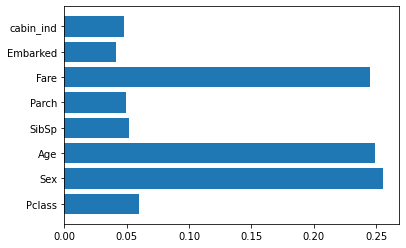

In [ ]:
import matplotlib.pyplot as plt
plt.barh(trainF.columns, rf_model3.feature_importances_)

### 4 - Predict future passegners

In [ ]:
sample_passengers = {
    'Pclass': [1, 3],
    'Name': ['Rose','Jack'],
    'Sex': [1, 0],
    'Age': [17, 20],
    'SibSp': [0,0],
    'Parch': [2, 0],
    'Fare': [50, 0],
    'cabin_ind': [1, 0],
    'Embarked': [2,2]
}

sample_passengers_df = pd.DataFrame(data=sample_passengers)
sample_passengers_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,cabin_ind,Embarked
0,1,Rose,1,17,0,2,50,1,2
1,3,Jack,0,20,0,0,0,0,2


In [ ]:
sample_passengers_df.drop('Name', axis=1, inplace=True)

survived_predicted = rf_model2.predict(sample_passengers_df)

sample_passengers_df['Survived'] = survived_predicted

sample_passengers_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,cabin_ind,Embarked,Survived
0,1,1,17,0,2,50,1,2,1
1,3,0,20,0,0,0,0,2,0


### Saving the Model

In [ ]:
%pip install pickle
%pip install joblib

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement pickle (from versions: none)
ERROR: No matching distribution found for pickle
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/usr/local/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Converts to binary
import pickle

# Saving and loading the model parameters
from joblib import dump, load
model_parameters = dump(rf_model2, './random_forest_classifier.joblib')

### Loading the Model

In [ ]:
rf_model_loaded = load('./random_forest_classifier.joblib')

In [ ]:
predictions = rf_model_loaded.predict(trainF)

print(predictions)

[0 0 1 0 1 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 1 0 0 1 0
 0 0 0 1 0 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0
 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 1
 0 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 1
 0 0 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0
 0 0 0 1 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0
 0 1 1 0 0 1 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 1 1 1 0 